In [1]:
import numpy as np
import cv2
import os
import pickle
import imagePreprocessingUtils as ipu
import matplotlib.pyplot as plt
import shutil
import random

In [2]:
class_labels = ipu.get_labels()

# Models Initializing 

In [3]:
cluster_model = pickle.load(open('mini_kmeans_model.sav', 'rb'))
classify_model = pickle.load(open('svm_model.sav', 'rb'))

# Collecting Images for Testing

In [4]:
dataset_path = r"C:\Users\Dwarakanath\Indian_Sign_Language_Recognition_main_project\Indian-sign-language-recognition-master\data_v1"
# Define the percentage of images to use for testing (in this case, 5%)
test_percent = 0.05
# Initialize a list to store test images as arrays
test_images_array = []
# Iterate over each class in your dataset
for class_name in os.listdir(dataset_path):
    class_dir = os.path.join(dataset_path, class_name)
    
    # Get a list of all image filenames in the class directory
    images = os.listdir(class_dir)
    
    # Calculate the number of images to move to the testing set
    num_test_images = int(len(images) * test_percent)
    random.shuffle(images)
    # Randomly select the specified number of images for testing
    test_images = random.sample(images, num_test_images)
    
    for image_name in test_images:
        image_path = os.path.join(class_dir, image_name)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Append the image data to the list
        test_images_array.append((image, class_name))


In [5]:
len(test_images_array)

2100

# Image Classification

10 Random Image Prediction 


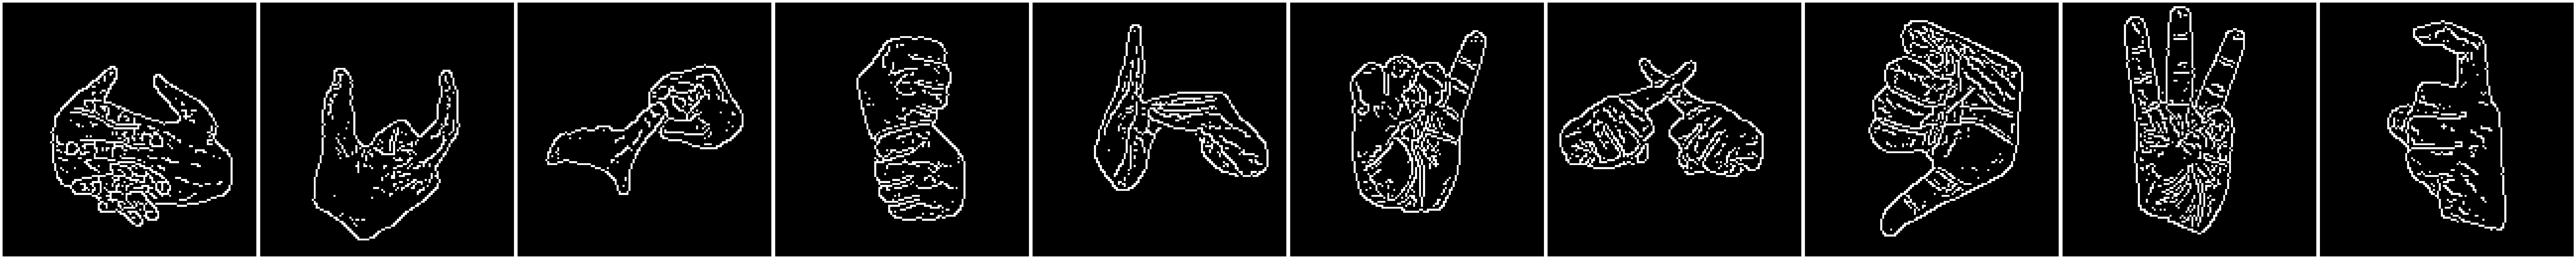

========= Predicted Label =========
W:98.66%  |  U:100.00%  |  Q:99.95%  |  G:99.94%  |  Z:99.85%  |  6:98.66%  |  X:99.27%  |  9:99.93%  |  3:96.14%  |  7:100.00%

========= True Label =========
W      U      Q      G      Z      6      X      9      3      7      

Image 1  label is Matching.
Image 2  label is Matching.
Image 3  label is Matching.
Image 4  label is Matching.
Image 5  label is Matching.
Image 6  label is Matching.
Image 7  label is Matching.
Image 8  label is Matching.
Image 9  label is Matching.
Image 10  label is Matching.


In [19]:
# Randomly select 10 image arrays with shuffle
random.shuffle(test_images_array)
random_images = random.sample(test_images_array, 10)

num_images = len(random_images)
fig, axes = plt.subplots(1, num_images, figsize=(100, 100))
predict_list = []
true_list = []
predict_label_list = []

# predicting 10 images
for i, (image, class_name) in enumerate(random_images):

    # true label list 
    true_list.append(class_name)

    # image converting to canny image with ORB Features extraction
    img = ipu.get_canny_edge(image)[0]
    orb_disc = ipu.get_ORB_descriptors(img)
    
    # Predict using the models
    visual_words = cluster_model.predict(orb_disc)
    bovw_histogram = np.array(np.bincount(visual_words, minlength=ipu.N_CLASSES * ipu.CLUSTER_FACTOR))
    pred_probabilities = classify_model.predict_proba([bovw_histogram])
    max_prob_index = np.argmax(pred_probabilities)
    confidence_score = pred_probabilities[0][max_prob_index]
    predicted_label = class_labels[max_prob_index]
    
    # Display the Canny edge image and predicted label with confidence score
    axes[i].imshow(img, cmap='gray')
    text = f"\033[1;93m{predicted_label}\033[0m:{confidence_score*100:.2f}%"
    predict_list.append(text)
    
    # predicting label list
    predict_label_list.append(predicted_label)
    axes[i].axis('off')

print("10 Random Image Prediction ")
plt.tight_layout()
plt.show()

print("========= Predicted Label =========")
for i  in range(len(predict_list)):
    if(i == 9):
        print(predict_list[i])
    else:
        print(predict_list[i], end = "  |  ")

print("\n========= True Label =========")
for i  in true_list:
    print(i, end = "      ")
print("\n")
for i in range(10):
    if (predict_label_list[i] == true_list[i]):
        print(f'Image {i+1}  label is \033[1;92mMatching\033[0m.')
    else:
        print(f'Image {i+1}  label is \033[1;91mNot Matching\033[0m.')
